In [1]:
%matplotlib inline
# import xarray as xr
# import numpy as np
# import scipy.interpolate as interp
import pandas as pd

import numpy as np
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

import xgboost
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
cmap = mpl.cm.get_cmap('BrBG')

In [3]:
df_roc_LR_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR.csv')
df_roc_LR_resample_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR_train.csv')
df_roc_LR = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR_raw.csv')
df_roc_LR_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR_raw_train.csv')

df_roc_RF_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF.csv')
df_roc_RF_resample_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF_train.csv')
df_roc_RF = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF_raw.csv')
df_roc_RF_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF_raw_train.csv')

df_roc_xgboost_resample = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost.csv')
df_roc_xgboost_resample_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost_train.csv')
df_roc_xgboost = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost_raw.csv')
df_roc_xgboost_train = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost_raw_train.csv')

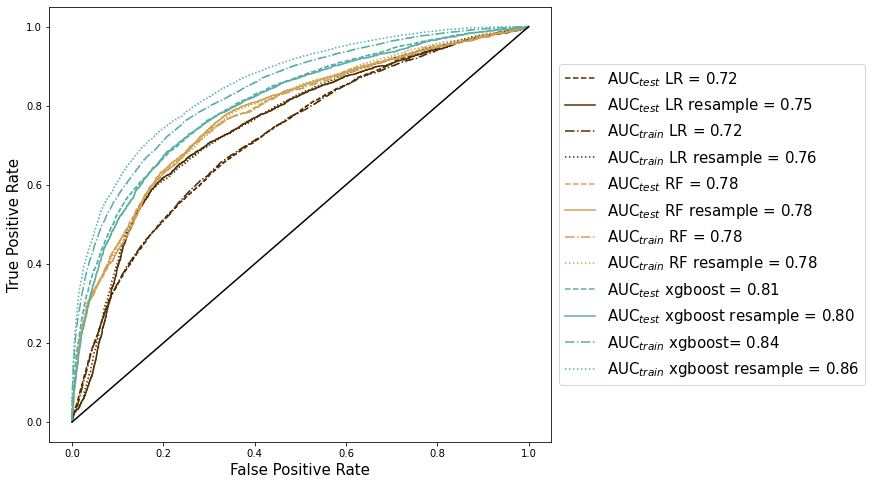

In [4]:
fig, ax = plt.subplots(figsize=(9, 8))


logit_roc_auc = roc_auc_score(df_roc_LR.true, df_roc_LR.prob)
y_test = df_roc_LR.true
predictions = df_roc_LR.prob
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0), linestyle='--', label='AUC$_{test}$ LR = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_LR_resample.true, df_roc_LR_resample.prob)
y_test = df_roc_LR_resample.true
predictions = df_roc_LR_resample.prob
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0), linestyle='-', label='AUC$_{test}$ LR resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_LR_train.true, df_roc_LR_train.prob)
y_test = df_roc_LR_train.true
predictions = df_roc_LR_train.prob
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0), linestyle='-.', label='AUC$_{train}$ LR = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_LR_resample_train.true, df_roc_LR_resample_train.prob)
y_test = df_roc_LR_resample_train.true
predictions = df_roc_LR_resample_train.prob
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0), linestyle=':', label='AUC$_{train}$ LR resample = %0.2f' % logit_roc_auc)


logit_roc_auc = roc_auc_score(df_roc_RF.true, df_roc_RF.probs)
y_test = df_roc_RF.true
predictions = df_roc_RF.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.25), linestyle='--', label='AUC$_{test}$ RF = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF_resample.true, df_roc_RF_resample.probs)
y_test = df_roc_RF_resample.true
predictions = df_roc_RF_resample.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.25), linestyle='-', label='AUC$_{test}$ RF resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF_train.true, df_roc_RF_train.probs)
y_test = df_roc_RF_train.true
predictions = df_roc_RF_train.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.25), linestyle='-.', label='AUC$_{train}$ RF = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_RF_resample_train.true, df_roc_RF_resample_train.probs)
y_test = df_roc_RF_resample_train.true
predictions = df_roc_RF_resample_train.probs
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.25), linestyle=':', label='AUC$_{train}$ RF resample = %0.2f' % logit_roc_auc)


logit_roc_auc = roc_auc_score(df_roc_xgboost.true, df_roc_xgboost.predictions)
y_test = df_roc_xgboost.true
predictions = df_roc_xgboost.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.75), linestyle='--', label='AUC$_{test}$ xgboost = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost_resample.true, df_roc_xgboost_resample.predictions)
y_test = df_roc_xgboost_resample.true
predictions = df_roc_xgboost_resample.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr,color=cmap(0.75), linestyle='-', label='AUC$_{test}$ xgboost resample = %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost_train.true, df_roc_xgboost_train.predictions)
y_test = df_roc_xgboost_train.true
predictions = df_roc_xgboost_train.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr, color=cmap(0.75), linestyle='-.', label='AUC$_{train}$ xgboost= %0.2f' % logit_roc_auc)

logit_roc_auc = roc_auc_score(df_roc_xgboost_resample_train.true, df_roc_xgboost_resample_train.predictions)
y_test = df_roc_xgboost_resample_train.true
predictions = df_roc_xgboost_resample_train.predictions
fpr, tpr, t = roc_curve(y_true=y_test, y_score=predictions)
ax.plot(fpr, tpr,color=cmap(0.75), linestyle=':', label='AUC$_{train}$ xgboost resample = %0.2f' % logit_roc_auc)


# y_test = reduced.true
# predictions = reduced.predictions
# fpr, tpr, t = metrics.roc_curve(y_true=y_test, y_score=predictions)
# ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k-')

ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
#ax.set_title('ROC of the different statistical model tried')

plt.savefig('/home/colili/Documents/PhD/project_john/Figure_produced/Raw/ROC_curves.pdf', bbox_inches='tight')